In [8]:
import os
import json

def load_json(file_path):
    """Load JSON file data."""
    with open(file_path, 'r') as file:
        return json.load(file)

def load_txt(file_path):
    """Load text file data and parse key configurations.
    
    This function handles cases where configuration lines may contain multiple colons,
    ensuring that all parts after the first colon are considered part of the value.
    """
    config_data = {}
    with open(file_path, 'r') as file:
        lines = file.readlines()
        for line in lines:
            if ':' in line:
                parts = line.strip().split(':', 1)
                if len(parts) == 2:
                    key, value = parts
                    config_data[key.strip()] = value.strip()
    return config_data

def analyze_trials(base_path):
    """Analyze trials in the given base path.
    
    This function walks through each trial's directory to gather configurations and model evaluation results.
    """
    trials_data = {}
    for trial in os.listdir(base_path):
        trial_path = os.path.join(base_path, trial)
        logs_path = os.path.join(trial_path, 'logs')
        models_path = os.path.join(logs_path, 'models')
        configs_path = os.path.join(logs_path, 'configs')
        
        # Load configuration data
        config_files = [f for f in os.listdir(configs_path) if f.endswith('.txt')]
        trial_config = {}
        for file in config_files:
            config_data = load_txt(os.path.join(configs_path, file))
            trial_config.update(config_data)
        
        # Load models evaluation data
        model_files = [f for f in os.listdir(models_path) if f.endswith('.json')]
        model_results = []
        for file in model_files:
            results_data = load_json(os.path.join(models_path, file))
            model_results.append(results_data)
        
        trials_data[trial] = {
            'configurations': trial_config,
            'evaluation_results': model_results
        }
    
    return trials_data

# Change this path to your actual directory path where experiments are stored
base_experiment_path = './experiments'
all_trials_data = analyze_trials(base_experiment_path)
print(json.dumps(all_trials_data, indent=4))


{
    "fin2_PotentialHolisticV2_NoGoRes": {
        "configurations": {
            "Experiment name": "fin2_PotentialHolisticV2_NoGoRes",
            "Seed": "3",
            "Algorithm": "PPO",
            "('configuration_save_path', './experiments/${Common": "experiment_name}/logs/configs/')",
            "('tensorboard_log', './experiments/${Common": "experiment_name}/tensorboard/')",
            "('save_path', './experiments/${Common": "experiment_name}/logs/models/')",
            "('video_folder', './experiments/${Common": "experiment_name}/logs/videos/')"
        },
        "evaluation_results": [
            {
                "white_goals": 0,
                "black_goals": 42,
                "outside_bounds": 0,
                "timeouts": 17
            },
            {
                "white_goals": 1,
                "black_goals": 42,
                "outside_bounds": 0,
                "timeouts": 28
            },
            {
                "white_goals": 0,
      

/var/folders/f6/g5h1jb2d6jn0pf5ybw0xh25w0000gn/T/ipykernel_9366/2169725454.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Trial', y='Goal Difference', data=median_df, palette='coolwarm')


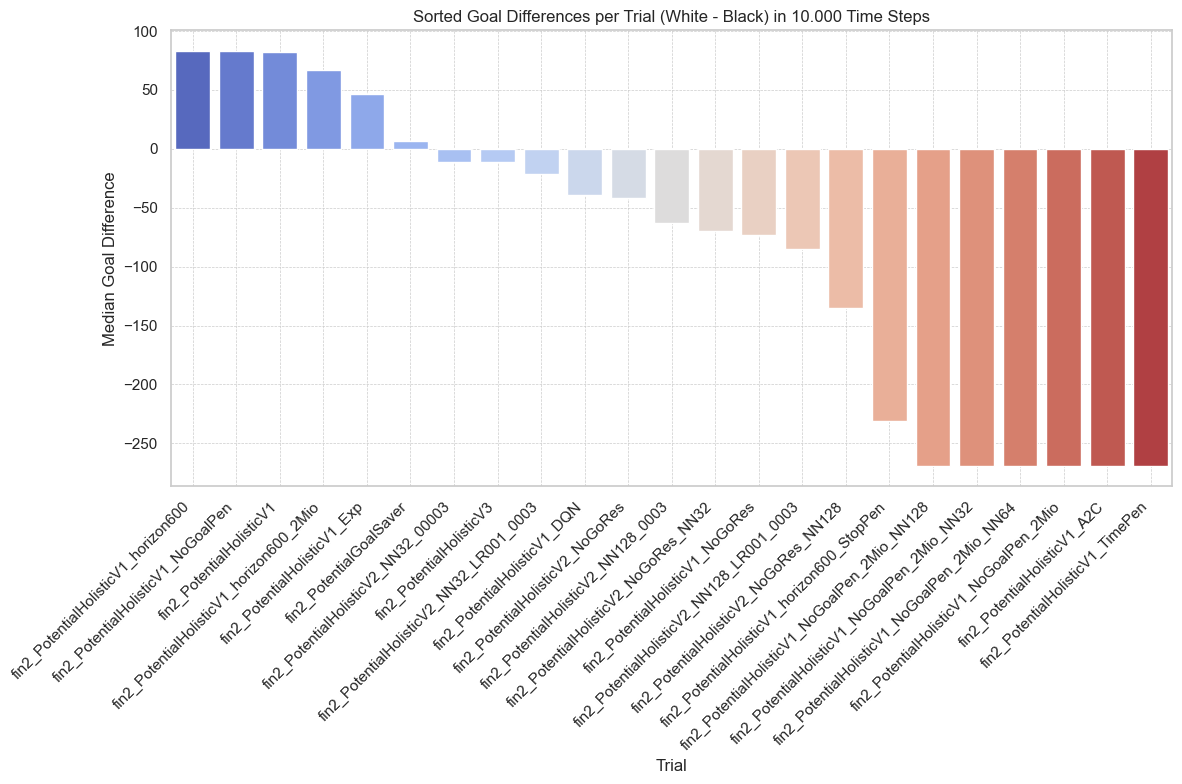

In [24]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def load_json(file_path):
    """Load JSON file data."""
    with open(file_path, 'r') as file:
        return json.load(file)

def load_txt(file_path):
    """Load text file data and parse key configurations."""
    config_data = {}
    with open(file_path, 'r') as file:
        lines = file.readlines()
        for line in lines:
            if ':' in line:
                parts = line.strip().split(':', 1)
                if len(parts) == 2:
                    key, value = parts
                    config_data[key.strip()] = value.strip()
    return config_data

def analyze_trials(base_path):
    """Analyze trials in the given base path."""
    trial_data_list = []
    for trial in os.listdir(base_path):
        trial_path = os.path.join(base_path, trial)
        models_path = os.path.join(trial_path, 'logs/models')
        
        # Load models evaluation data
        model_files = [f for f in os.listdir(models_path) if f.endswith('.json')]
        model_results = []
        for file in model_files:
            results_data = load_json(os.path.join(models_path, file))
            results_data['Trial'] = trial
            model_results.append(results_data)
        
        trial_data_list.extend(model_results)
    
    return pd.DataFrame(trial_data_list)

def plot_goal_differences(df):
    """Plot the differences between white and black goals across trials, sorted by the magnitude of the difference."""
    # Calculate median of relevant metrics for each trial
    df['Goal Difference'] = df['white_goals'] - df['black_goals']
    median_df = df.groupby('Trial').median().reset_index()
    
    # Sort by 'Goal Difference'
    median_df = median_df.sort_values('Goal Difference', ascending=False)
    
    # Set up the matplotlib figure
    plt.figure(figsize=(12, 8))  # Adjust figure size as needed
    sns.barplot(x='Trial', y='Goal Difference', data=median_df, palette='coolwarm')
    plt.title('Sorted Goal Differences per Trial (White - Black) in 10.000 Time Steps')
    plt.ylabel('Median Goal Difference')
    plt.xlabel('Trial')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()

# Path to your experiments
base_experiment_path = './experiments'
df_trials = analyze_trials(base_experiment_path)
plot_goal_differences(df_trials)
